# I. Lý thuyết

1) Mạng tích chập CNN sẽ được thực hiện như thế nào?

A. Phân chia feature map thành các ma trận theo chiều channel và thực hiện tích chập giữa mỗi ma trận kernel với từng chiều.

B. Thực hiện phép nhân ma trận kernel với chuyển vị của ma trận local receptive field để thu được giá trị feature map output.

C. Tính trung bình các phân tử trên một ma trận local receptive field.

D. Di chuyển vùng local receptive field theo chiều từ trái sang phải và từ trên xuống dưới và nhân tích chập với kernel để thu được ma trận feature map.

# Đáp án 1D

2) Thực hiện phép nhân tích chập giữa ma trận đầu vào kích thước width và height lần lượt là $(W, H)$ với bộ lọc kích thước $(F, F)$ và bước nhảy $S$ thì thu được ma trận đầu ra với kích thước width và height $(W', H')$ là bao nhiêu? Hãy lựa chọn công thức tổng quát nhất.

A. $W' =⌊ \frac{W-F}{S} ⌋ + 1;~ H' =⌊ \frac{H-F}{S} ⌋ + 1$

B. $W' =\lceil \frac{W-F}{S} \rceil + 1;~ H' = \lceil \frac{H-F}{S} \rceil + 1$ 

C. $W' =\lfloor \frac{W-F+2P}{S} \rfloor + 1;~ H' = \lfloor \frac{H-F+2P}{S} \rfloor + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

D. $W' =\lceil \frac{W-F+P}{S} \rceil + 1;~ H' = \lceil \frac{H-F+P}{S} \rceil + 1$ với $P$ là số lượng các véc tơ 0 padding ở bên ngoài đều hai phía.

# Đáp án 2C

3) Mạng CNN sẽ học được những gì qua các layers?

A. Tại những layers đầu mỗi channels sẽ giúp phân biệt một loại đặc trưng, của vật thể. Những đặc trưng này sau đó được trải phẳng và đưa vào mạng MLP để phân loại vật thể.

B. Những layers cuối cùng sẽ zoom vào từng chi tiết của vật thể để phân loại vật thể.

C. Tại những layers đầu mạng sẽ học được các đặc trưng chung như các edge dọc, ngang, chéo,.... Các đặc trưng chi tiết và tổng quát giúp nhận diện vật thể được học tại những layers cuối cùng.

D. Các layers đầu tiên sẽ tập trung vào các chi tiết bộ phận của vật thể.

## Đáp án 3C

4) Kiến trúc chung của một mạng CNN là gì?

A. _[Conv -> BatchNorm -> Activation -> Maxpooling] x n_

B. _[BatchNorm -> Conv -> Activation -> Maxpooling] x n_ 

C. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n_ 

D. _[Conv -> BatchNorm -> Maxpooling -> Activation -> Maxpooling] x n -> Flatten -> [FullyConnected -> Activation] x m -> Softmax_ 

## Đáp án 4D

5) Thông thường đặc điểm kích thước feature map của mạng neural sẽ như thế nào ?

A. Kích thước feature map tăng dần gấp đôi qua thời gian.

B. Kích thước feature map sẽ duy trì không đổi qua thời gian.

C. Kích thước mạng sẽ giảm dần gấp đôi sau mỗi một lần downsampling và sau đó tăng dần gấp đôi sau mỗi lần upsampling để khôi phục về kích thước ảnh input.

D. Kích thước mạng thường giảm gấp đôi sau một lần downsampling và số lượng các filters tăng dần.

## Đáp án 5D

# II. Thực hành

6) Thực hiện xây dựng và huấn luyện một mạng CNN ngẫu nhiên trên bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data). Lưu ý cần thực hiện [chuẩn hóa dữ liệu](https://github.com/pytorch/examples/issues/112) đối với bộ dữ liệu ImageNet trước khi huấn luyện.

7) Grid Search kiến trúc CNN dựa trên việc tổng quát hóa một thiết kế câu 6.

8) Huấn luyện lại mô hình bằng kiến trúc ResNet và MobileNet. Đánh giá chi phí tính toán và submit kết quả độ chính xác trên các ảnh thuộc folder test.

9) Thử nghiệm các phương pháp Augmentation như Flip, Rotation, Random Crop, Bright Contrast để cải thiện kết quả mô hình.

10) Lập bảng kết quả các thử nghiệm đã sử dụng.

In [ ]:
!pip install autokeras

     |████████████████████████████████| 160 kB 8.3 MB/s 
     |████████████████████████████████| 98 kB 6.8 MB/s 
     |████████████████████████████████| 462 kB 41.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/dog-vs-cat-classification.zip"

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D, Input,BatchNormalization
import tensorflow as tf
import pandas as pd
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
import os
import numpy as np
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

# image_generator.mean = [123.68, 116.779, 103.939]

In [ ]:
path = '/content/train/train'
batch_size = 32
epochs = 10
image_size = (224,224)
def get_generator(image_data_generator, directory, train_valid=None, seed=None):
    train_generator = image_data_generator.flow_from_directory(directory, batch_size=batch_size, class_mode='binary', target_size=(224,224), subset=train_valid, seed=seed)    
    return train_generator


def get_ImageDataGenerator(validation_split=None):
    image_generator = ImageDataGenerator(featurewise_center=True,
                                        validation_split=validation_split)
    image_generator.mean = [123.68, 116.779, 103.939]
    return image_generator

image_gen_train = get_ImageDataGenerator(validation_split=0.2)
train_generator = get_generator(image_gen_train, path, train_valid='training', seed=1)
validation_generator = get_generator(image_gen_train, path, train_valid='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


Create the model


In [ ]:

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
  optimizer='rmsprop',metrics=['accuracy'])

In [ ]:

history = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs 
)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


625/625 [==============================] - 111s 175ms/step - loss: 0.6792 - accuracy: 0.6731 - val_loss: 0.5531 - val_accuracy: 0.7268
Epoch 2/10
625/625 [==============================] - 109s 174ms/step - loss: 0.4506 - accuracy: 0.7913 - val_loss: 0.4100 - val_accuracy: 0.8176
Epoch 3/10
625/625 [==============================] - 108s 173ms/step - loss: 0.3596 - accuracy: 0.8408 - val_loss: 0.4651 - val_accuracy: 0.8156
Epoch 4/10
625/625 [==============================] - 108s 173ms/step - loss: 0.2942 - accuracy: 0.8780 - val_loss: 0.3705 - val_accuracy: 0.8482
Epoch 5/10
625/625 [==============================] - 109s 174ms/step - loss: 0.2395 - accuracy: 0.9025 - val_loss: 0.3413 - val_accuracy: 0.8506
Epoch 6/10
625/625 [==============================] - 108s 173ms/step - loss: 0.1889 - accuracy: 0.9272 - val_loss: 0.4832 - val_accuracy: 0.8490
Epoch 7/10
625/625 [==============================] - 108s 173ms/step - loss: 0.1459 - accuracy: 0.9440 - val_loss: 0.5235 - val_accura

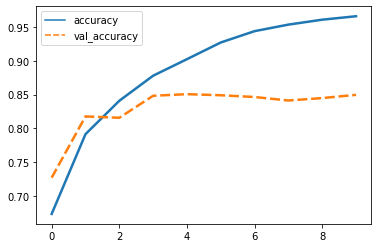

In [ ]:
# compare accuracy accuracy on training and validation data
df_history = pd.DataFrame(history.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

Mạng hoạt động cũng khá tốt

## **Hypertuning the Model**

In [ ]:
def build_model(hp):

    model = Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  
    
    layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    # adding first pooling
    layers.MaxPooling2D(),
    # adding second convolutional layer
    layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    # adding first pooling
    layers.MaxPooling2D(),
    # adding flatten layer    
    # adding third convolutional layer
    layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_3_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    # adding third pooling
    layers.MaxPooling2D(),
    #adding flatten
    layers.Flatten(),
    # adding dense layer    
    layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    layers.Dense(1, activation='sigmoid')
    ])
    #compilation of model
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
#importing random search
from kerastuner import RandomSearch
#creating randomsearch object
tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 10)
# search best parameter
tuner.search(train_ds,epochs=7,validation_data=val_ds)

Trial 10 Complete [00h 03m 44s]
val_accuracy: 0.504800021648407

Best val_accuracy So Far: 0.7793999910354614
Total elapsed time: 00h 28m 28s
INFO:tensorflow:Oracle triggered exit


Bài trên sử dụng RandomSearch từ Keras Tuner dựa trên architecture  (conv2 -> pooling)x3 -> flatten -> (dense) -> dense2-sigmoid 

Mình lấy model ít để chạy nhanh hơn ( mục tiêu chỉ để sử dụng KERAS TUNER )
Một số parameter cần tuner như filter , kernel size ,units của dense , learning_rate

Vì thời gian chạy khá lâu nên em đã thử trials=10 , vì cấu trúc khá sơ sài nên độ chính xác khá thấp, vì hiệu quả các mô hình SOTA hiệu quả hơn nên mình không tập trung phần này

#**RESNET-50**

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

In [ ]:
resnet_model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_16 (Flatten)        (None, 2048)              0         
                                                                 
 dense_31 (Dense)            (None, 512)               1049088   
                                                                 
 dense_32 (Dense)            (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history_resnet = resnet_model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs 
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
625/625 [==============================] - 117s 181ms/step - loss: 0.0822 - accuracy: 0.9733 - val_loss: 0.0501 - val_accuracy: 0.9820
Epoch 2/10
625/625 [==============================] - 112s 179ms/step - loss: 0.0393 - accuracy: 0.9852 - val_loss: 0.0572 - val_accuracy: 0.9796
Epoch 3/10
625/625 [==============================] - 111s 178ms/step - loss: 0.0319 - accuracy: 0.9881 - val_loss: 0.0509 - val_accuracy: 0.9818
Epoch 4/10
625/625 [==============================] - 112s 178ms/step - loss: 0.0256 - accuracy: 0.9903 - val_loss: 0.0540 - val_accuracy: 0.9840
Epoch 5/10
625/625 [==============================] - 111s 178ms/step - loss: 0.0215 - accuracy: 0.9916 - val_loss: 0.0692 - val_accuracy: 0.9816
Epoch 6/10
625/625 [==============================] - 111s 178ms/step - loss: 0.0159 - accuracy: 0.9943 - val_loss: 0.0752 - val_accuracy: 0.9788
Epoch 7/10
625/625 [==============================] - 110s 176ms/step - loss: 0.0101 - accuracy: 0.9965 - val_loss: 0.0716 -

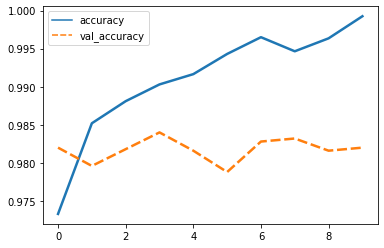

In [ ]:
df_history = pd.DataFrame(history_resnet.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

Accuray đã cải thiện khá nhiều

# **MOBILENET-V2**

In [ ]:
mobilenetV2_model = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

mobilenetV2_model.add(pretrained_model)
mobilenetV2_model.add(Flatten())
mobilenetV2_model.add(Dense(512, activation='relu'))
mobilenetV2_model.add(Dense(1, activation='sigmoid'))

In [ ]:
resnet_model.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_16 (Flatten)        (None, 2048)              0         
                                                                 
 dense_31 (Dense)            (None, 512)               1049088   
                                                                 
 dense_32 (Dense)            (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
mobilenetV2_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history_mobilev2 = mobilenetV2_model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs 
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
625/625 [==============================] - 110s 170ms/step - loss: 0.3889 - accuracy: 0.8203 - val_loss: 0.3498 - val_accuracy: 0.8450
Epoch 2/10
625/625 [==============================] - 106s 170ms/step - loss: 0.3334 - accuracy: 0.8502 - val_loss: 0.3419 - val_accuracy: 0.8484
Epoch 3/10
625/625 [==============================] - 106s 169ms/step - loss: 0.3018 - accuracy: 0.8684 - val_loss: 0.3368 - val_accuracy: 0.8506
Epoch 4/10
625/625 [==============================] - 106s 169ms/step - loss: 0.2844 - accuracy: 0.8757 - val_loss: 0.3440 - val_accuracy: 0.8514
Epoch 5/10
625/625 [==============================] - 106s 169ms/step - loss: 0.2612 - accuracy: 0.8853 - val_loss: 0.3519 - val_accuracy: 0.8504
Epoch 6/10
625/625 [==============================] - 106s 169ms/step - loss: 0.2405 - accuracy: 0.8959 - val_loss: 0.3427 - val_accuracy: 0.8498
Epoch 7/10
625/625 [==============================] - 106s 169ms/step - loss: 0.2143 - accuracy: 0.9076 - val_loss: 0.3898 -

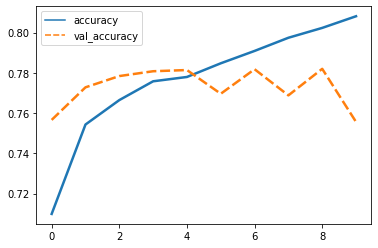

In [ ]:
df_history = pd.DataFrame(history_mobilev2.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

Pretrained model trên mobilenetv2 khá tệ

## **DATA AUGMENTATION**


          - rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
          - width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
          - rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
          - shear_range is for randomly applying shearing transformations
          - zoom_range is for randomly zooming inside pictures
          - horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
          - fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

In [ ]:
CB = [
            keras.callbacks.ModelCheckpoint(
            filepath="fine_tuning.keras",
            save_best_only=True,
            monitor="val_loss"),
            keras.callbacks.EarlyStopping(
            monitor='val_loss',
            min_delta=0.0005,
            patience=3)
]

In [ ]:
def get_generator(image_data_generator, directory, train_valid=None, seed=None):
    train_generator = image_data_generator.flow_from_directory(directory, batch_size=batch_size, class_mode='binary', target_size=(224,224), subset=train_valid, seed=seed)    
    return train_generator

In [ ]:
def get_ImageDataGenerator_augmented(validation_split=None):
    image_generator = ImageDataGenerator(featurewise_center=True,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.1,
                                        brightness_range=[0.8,1.2],
                                        horizontal_flip=True,
                                        validation_split=validation_split)
    image_generator.mean = [123.68, 116.779, 103.939]
    return image_generator
image_gen_train_aug = get_ImageDataGenerator_augmented(validation_split=0.2)
train_generator_aug = get_generator(image_gen_train_aug, path, train_valid='training', seed=1)
validation_generator_aug = get_generator(image_gen_train_aug, path, train_valid='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
resnet_model_aug = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model_aug.add(pretrained_model)

resnet_model_aug.add(Flatten())
resnet_model_aug.add(Dense(512, activation='relu'))
resnet_model_aug.add(Dense(1, activation='sigmoid'))

In [ ]:
resnet_model_aug.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 10
history_resnet_aug = resnet_model_aug.fit_generator(train_generator_aug, validation_data=validation_generator_aug, epochs=epochs,callbacks=CB)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
625/625 [==============================] - 401s 642ms/step - loss: 0.0801 - accuracy: 0.9690 - val_loss: 0.0687 - val_accuracy: 0.9728
Epoch 2/10
625/625 [==============================] - 392s 627ms/step - loss: 0.0707 - accuracy: 0.9719 - val_loss: 0.0652 - val_accuracy: 0.9720
Epoch 3/10
625/625 [==============================] - 393s 629ms/step - loss: 0.0637 - accuracy: 0.9748 - val_loss: 0.0699 - val_accuracy: 0.9726
Epoch 4/10
625/625 [==============================] - 390s 625ms/step - loss: 0.0600 - accuracy: 0.9758 - val_loss: 0.0709 - val_accuracy: 0.9708
Epoch 5/10
625/625 [==============================] - 390s 624ms/step - loss: 0.0594 - accuracy: 0.9768 - val_loss: 0.0724 - val_accuracy: 0.9720


Early stopping tại epoch thứ 5

In [ ]:
path_test = '/content/test/test'


In [ ]:
test_imgs = os.listdir('/content/test/test')
test_df = pd.DataFrame({"id": test_imgs})
print(test_df.shape[0])

8000


In [ ]:
datagen = ImageDataGenerator()
test_ds = datagen.flow_from_directory('/content/test', class_mode='binary', batch_size=batch_size)

Found 8000 images belonging to 1 classes.


In [ ]:
predict = resnet_model_aug.predict(test_ds)


In [ ]:
predict

array([1.], dtype=float32)

In [ ]:
test_df['labels'] = [1 if i>0.55 else 0 for i in predict]

In [ ]:
test_df

In [ ]:
test_df = test_df.sort_values(by='id')
test_df.to_csv('submission.csv',index=False)
test_df.head(20)

# **COMPARE PERFORMANCE**

| Model       |  Accuracy Val  | Trainable params    | Total params|
| :---        |    :----:   |          :---: |  :--:     |
| CNN         |      0.84  |      6       |6         |
| ResNet50    | 0.98     | 24      |    1     |
| MobileNetV2 | 0.85      | 24      |1       |
| ResNetv2-augmentation  | 0.97       | 24      |1|

KẾT QUẢ KAGGLE 98.83 trên folder test....Mình sẽ cải thiện  kết quả tốt nhất lên Kaggle trong tuần sau 

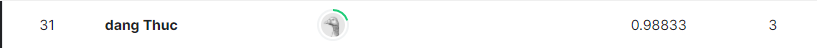
